# BlogCatalog expermintation

In [43]:
import os

import matplotlib.pyplot as plt
import plotly.graph_objs as go

import networkx as nx

from gensim.models import Word2Vec
from node2vec import Node2Vec

## Graph

In [3]:
# cd thesis

In [40]:
blog_dir = 'thesis/datasets/blog_catalog/data/'

In [41]:
G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')

In [8]:
nx.info(G)

/tmp/ipykernel_116/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 10312 nodes and 333983 edges'

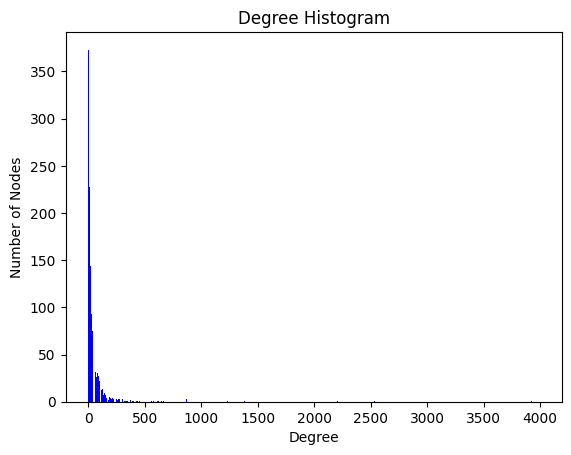

In [9]:
# Compute the degree histogram
degree_hist = nx.degree_histogram(G)

# Plot the degree histogram
plt.bar(range(len(degree_hist)), degree_hist, width=0.8, color='b', )

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Histogram')

# Display the plot
plt.show()

In [10]:
degree_list = sorted([G.degree(i) for i in G], reverse=True)

In [16]:
# plt.plot(range(len(degree_list)), degree_list)

In [49]:
# Create a trace
trace = go.Scatter(
    y=degree_list,
    mode='lines'
)

# Create layout
layout = go.Layout(
    title='BlogCatalog network degree distribution',
    xaxis=dict(title='Nodes'),
    yaxis=dict(title='Degree') #, type='log')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
fig.show()

In [51]:
# Create a trace
trace = go.Scatter(y=degree_list, mode='lines')

# Create layout
layout = go.Layout(
    title='BlogCatalog network degree distribution (log-log)',
    xaxis=dict(title='Nodes', type='log'),
    yaxis=dict(title='Degree', type='log')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
fig.show()

## Node2Vec

In [19]:
# # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
# node2vec = Node2Vec(G, dimensions=128, walk_length=80, num_walks=10, workers=64, temp_folder='temp_folder/')  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/10312 [00:00<?, ?it/s]

Generating walks (CPU: 1):   0%|          | 0/1 [00:00<?, ?it/s]






































































































































































































Generating walks (CPU: 28): 0it [00:00, ?it/s]

















Generating walks (CPU: 30): 0it [00:00, ?it/s][A
Generating walks (CPU: 35): 0it [00:00, ?it/s]
Generating walks (CPU: 38): 0it [00:00, ?it/s]
Generating walks (CPU: 49): 0it [00:00, ?it/s]
Generating walks (CPU: 54): 0it [00:00, ?it/s]
Generating walks (CPU: 57): 0it [00:00, ?it/s]










Generating walks (CPU: 11): 0it [00:07, ?it/s]
Generating walks (CPU: 14): 0it [00:06, ?it/s]
Generating walks (CPU: 13): 0it [00:06, ?it/s]
































Generating walks (CPU: 15): 0it [00:07, ?it/s][A
Generating walks (CPU: 16): 0it [00:06, ?it/s]


































































Generating walks (CPU: 26): 0it [00:05, ?it/

In [42]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format(blog_dir+'blog_embeddings.emb')

In [37]:
os.listdir(blog_dir)

['nodes.csv',
 'edges.csv',
 'group-edges.csv',
 'groups.csv',
 'blog_embeddings.emb',
 'blog_embeddings.model']

In [59]:
# Fit if not existing
# model = node2vec.fit()

# Load the model
model = Word2Vec.load(blog_dir+'blog_embeddings.model')

model.wv.most_similar(0)

# # Save embeddings for later use
# model.wv.save_word2vec_format('embeddings.emb')

# # Save model for later use
# model.save('embeddings.model')

AttributeError: This method should be called on a class object.

In [58]:
walks = model.simulate_walks(G, num_walks=10, walk_length=10, p=model.p, q=model.q)

AttributeError: 'Word2Vec' object has no attribute 'simulate_walks'

In [66]:
dir(model.wv)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__ignoreds',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__numpys',
 '__recursive_saveloads',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__scipys',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector

In [75]:
model

You're right, my previous response on generating new walks assumed a more general node2vec library structure. Here's a more accurate approach for generating new walks specifically with eliorc's implementation:

Since eliorc's `model.save` might not directly save the walk generation logic, we can't use `model.simulate_walks` in this case. Here are alternative approaches:

1. **Re-create the Model (if feasible):**

- If you have your original training configuration (walk parameters, walk number, walk length), consider recreating the model architecture using `node2vec.Graph` and `node2vec.EdgeEmbedder`.
- Once recreated, you can use the model's `walk` method to generate new walks with the same parameters used for training.

2. **Explore Custom Implementations:**

- If recreating the model isn't feasible, explore modifying eliorc's code to expose walk generation functionality. This might involve understanding how the library implements random walks and potentially adding a method for external access.

**Important Considerations:**

- Modifying library code requires familiarity with the implementation and can be risky.
- Even if you access the walk generation logic, it might not be designed for generating walks outside the training context.

**Recommendation:**

- If recreating the model with the original parameters is achievable, this is the suggested approach.
- Modifying library code should be a last resort due to the potential complexities and risks involved.

**Additional Tips:**

- Consider the trade-off between effort and benefits. If your primary goal is co-occurrence analysis, exploring embedding similarity (as mentioned earlier) might be a simpler alternative.
- Consult eliorc's documentation or community forums to see if there are known techniques for generating new walks with saved models in this specific implementation.
